In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
tura ru
dikson ru
mataura pf
codrington ag
georgetown sh
clyde river ca
busselton au
santiago de cao pe
tiksi ru
bluff nz
dasoguz tm
new norfolk au
hilo us
kupang id
chokurdakh ru
ushuaia ar
rikitea pf
mahebourg mu
souillac mu
constitucion mx
caravelas br
bubaque gw
saldanha za
mataura pf
valentin gomez farias mx
san patricio mx
vaini to
whitehorse ca
mercedes ar
saskylakh ru
adrar dz
umzimvubu za
thinadhoo mv
bambous virieux mu
mataura pf
amderma ru
cidreira br
mount isa au
umzimvubu za
san quintin mx
riyadh sa
barrow us
hastings us
vao nc
punta arenas cl
rikitea pf
ahipara nz
kavieng pg
puurmani ee
vila velha br
busselton au
yellowknife ca
jamestown sh
las cruces us
semey kz
punta arenas cl
arraial do cabo br
chokurdakh ru
busselton au
utiroa ki
ponta do sol cv
timmins ca
kapaa us
yongan cn
rikitea pf
moose factory ca
ushuaia ar
belushya guba ru
belushya guba ru
ambon id
albany au
quatre cocos mu
beringovskiy ru
dikson ru
caldwell us
avarua ck
lampang th
callaguip ph
t

hithadhoo mv
sao felix do xingu br
chuy uy
deer lake ca
atuona pf
tuktoyaktuk ca
mount gambier au
sabaudia it
hermanus za
hithadhoo mv
rikitea pf
chokurdakh ru
eyl so
busselton au
narsaq gl
maniitsoq gl
punta arenas cl
bang saphan th
manicore br
stornoway gb
provideniya ru
tual id
punta arenas cl
lavrentiya ru
qaanaaq gl
luwuk id
sao filipe cv
rikitea pf
yakeshi cn
port alfred za
nguiu au
hukuntsi bw
peleduy ru
mataura pf
belushya guba ru
bluff nz
bredasdorp za
barrow us
busselton au
mataura pf
tapaua br
qaanaaq gl
akdepe tm
port hardy ca
hobart au
vaini to
aksarka ru
nikolskoye ru
ust-kamchatsk ru
punta arenas cl
grindavik is
new norfolk au
mahebourg mu
pevek ru
puerto ayora ec
pangnirtung ca
bethel us
nikolskoye ru
daru pg
rungata ki
victoria sc
kungurtug ru
saldanha za
pemberton ca
namuac ph
lethem gy
port alfred za
bilma ne
cervo es
rikitea pf
daru pg
samarai pg
rikitea pf
tasiilaq gl
sorland no
cayenne gf
mataura pf
tuktoyaktuk ca
upernavik gl
formoso do araguaia br
zhangye cn
qaa

cape town za
shingu jp
lethem gy
ushuaia ar
cherskiy ru
nishihara jp
busselton au
lompoc us
vao nc
songjianghe cn
narsaq gl
madinat sittah uktubar eg
huarmey pe
tautira pf
grand river south east mu
ushuaia ar
east london za
isangel vu


In [6]:
# Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

   # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | santiago de cao
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | dasoguz
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | kupang
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | caravelas
Processing Record 23 of Set 1 | bubaque


Processing Record 38 of Set 4 | hunza
City not found. Skipping...
Processing Record 39 of Set 4 | amapa
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | mao
Processing Record 44 of Set 4 | sol-iletsk
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | linkou
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | tabuk
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | kachiry
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | fortuna
Processing Record 10 of Set 5 | erenhot
Processing Record 11 of Set 5 | sentyabrskiy
City not fo

Processing Record 32 of Set 8 | aravete
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | viligili
City not found. Skipping...
Processing Record 35 of Set 8 | tarudant
City not found. Skipping...
Processing Record 36 of Set 8 | tasiilaq
Processing Record 37 of Set 8 | puteyets
Processing Record 38 of Set 8 | zhigalovo
Processing Record 39 of Set 8 | sao felix do xingu
Processing Record 40 of Set 8 | deer lake
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | sabaudia
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | bang saphan
Processing Record 45 of Set 8 | manicore
Processing Record 46 of Set 8 | stornoway
Processing Record 47 of Set 8 | tual
Processing Record 48 of Set 8 | luwuk
Processing Record 49 of Set 8 | yakeshi
Processing Record 50 of Set 8 | hukuntsi
Processing Record 1 of Set 9 | peleduy
Processing Record 2 of Set 9 | tapaua
City not found. Skipping...
Processing Record 3 of Set 9 | akdepe
Processing Record

Processing Record 14 of Set 12 | bosaso
Processing Record 15 of Set 12 | rovaniemi
Processing Record 16 of Set 12 | esna
Processing Record 17 of Set 12 | xichang
Processing Record 18 of Set 12 | dunedin
Processing Record 19 of Set 12 | northam
Processing Record 20 of Set 12 | adrian
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 12 | cocoa beach
Processing Record 23 of Set 12 | okhotsk
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | hejnice
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | burica
City not found. Skipping...
Processing Record 28 of Set 12 | atkarsk
Processing Record 29 of Set 12 | harrisburg
Processing Record 30 of Set 12 | grimari
City not found. Skipping...
Processing Record 31 of Set 12 | dandong
Processing Record 32 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 34 of S

554

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,73.11,89,70,13.62,ZA,2022-03-11 23:37:32
1,Tura,25.5198,90.2201,66.96,29,53,2.08,IN,2022-03-11 23:37:33
2,Dikson,73.5069,80.5464,-1.46,89,100,23.73,RU,2022-03-11 23:37:33
3,Mataura,-46.1927,168.8643,55.47,76,97,10.45,NZ,2022-03-11 23:37:33
4,Codrington,-38.2667,141.9667,62.71,51,2,7.90,AU,2022-03-11 23:37:34
5,Georgetown,5.4112,100.3354,80.53,93,20,2.30,MY,2022-03-11 23:33:48
6,Clyde River,70.4692,-68.5914,-25.37,75,0,2.30,CA,2022-03-11 23:37:34
7,Busselton,-33.6500,115.3333,72.91,77,12,13.40,AU,2022-03-11 23:37:35
8,Santiago De Cao,-7.9589,-79.2392,68.13,88,40,8.05,PE,2022-03-11 23:37:35
9,Tiksi,71.6872,128.8694,-11.61,90,100,8.14,RU,2022-03-11 23:37:35


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-03-11 23:37:32,-33.5906,26.8910,73.11,89,70,13.62
1,Tura,IN,2022-03-11 23:37:33,25.5198,90.2201,66.96,29,53,2.08
2,Dikson,RU,2022-03-11 23:37:33,73.5069,80.5464,-1.46,89,100,23.73
3,Mataura,NZ,2022-03-11 23:37:33,-46.1927,168.8643,55.47,76,97,10.45
4,Codrington,AU,2022-03-11 23:37:34,-38.2667,141.9667,62.71,51,2,7.90
5,Georgetown,MY,2022-03-11 23:33:48,5.4112,100.3354,80.53,93,20,2.30
6,Clyde River,CA,2022-03-11 23:37:34,70.4692,-68.5914,-25.37,75,0,2.30
7,Busselton,AU,2022-03-11 23:37:35,-33.6500,115.3333,72.91,77,12,13.40
8,Santiago De Cao,PE,2022-03-11 23:37:35,-7.9589,-79.2392,68.13,88,40,8.05
9,Tiksi,RU,2022-03-11 23:37:35,71.6872,128.8694,-11.61,90,100,8.14


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

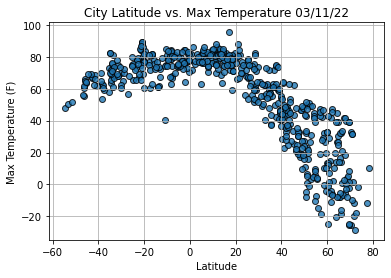

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

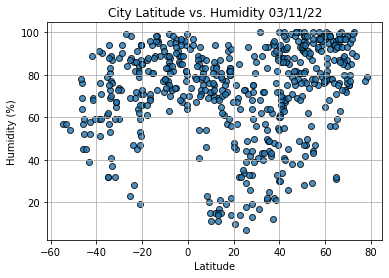

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

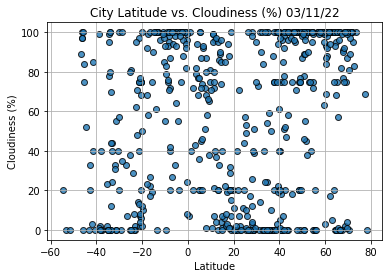

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

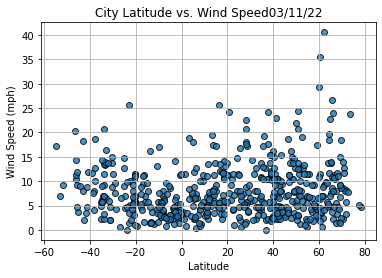

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [112]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [113]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

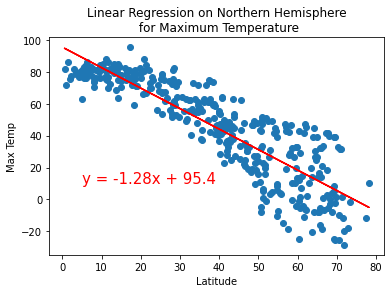

In [114]:
#Linear regression on max temp for northern hemisphere

# 1. set the x values = latitude and y values = max temperature column from northern hemi DF
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# 2. call the plot_linear_regression function with x and y values
# 3. edit the title, y label and text coordinates for max temp scatter plot
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere\n for Maximum Temperature',
                      'Max Temp',(5,10))

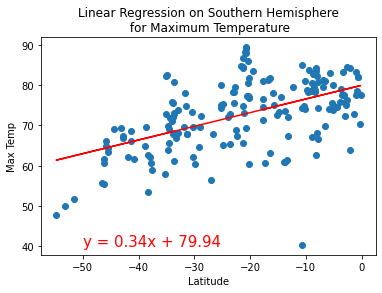

In [115]:
#Linear regression on max temp for southern hemisphere

# 1. set the x values = latitude and y values = max temperature column from southern hemi DF
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# 2. call the plot_linear_regression function with x and y values
# 3. edit the title, y label and text coordinates for max temp scatter plot
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Southern Hemisphere\n for Maximum Temperature',
                      'Max Temp',(-50,40))

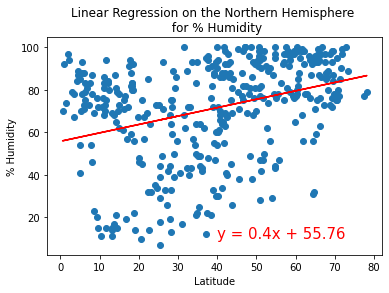

In [116]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

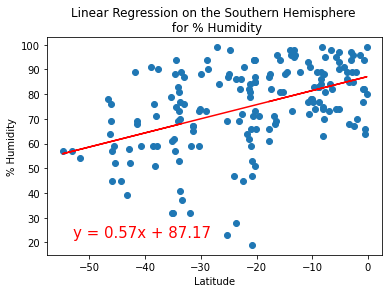

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-53,22))

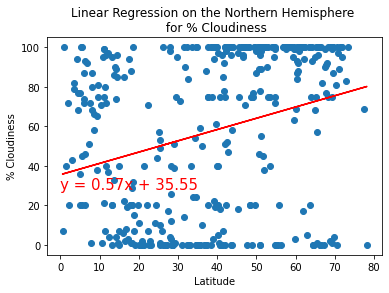

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,28))

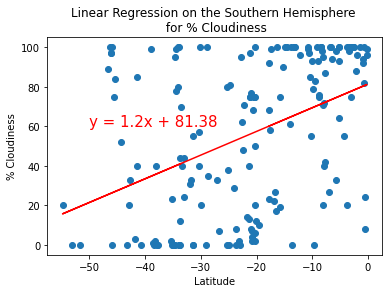

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

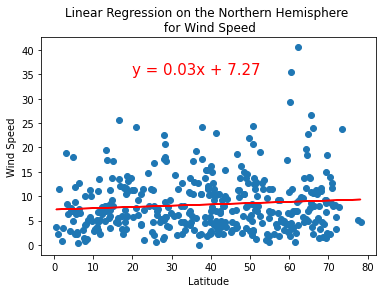

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,35))

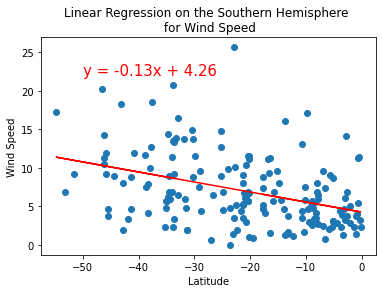

In [127]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,22))